![alt text](https://miro.medium.com/max/1255/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

#Load the data


In [0]:
! git clone https://github.com/manmeet0307/EarData


Cloning into 'EarData'...
remote: Enumerating objects: 28576, done.
remote: Total 28576 (delta 0), reused 0 (delta 0), pack-reused 28576
Receiving objects: 100% (28576/28576), 95.41 MiB | 36.48 MiB/s, done.
Resolving deltas: 100% (6399/6399), done.
Checking out files: 100% (28412/28412), done.


In [0]:
!ls


EarData  sample_data


In [0]:
import os,shutil
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

Using TensorFlow backend.


#Divide the Data into Test, Train and Validation Set



1.   Create Folders:Test,Train,Validation
2.   Split data
3.   Rearrage data according to their gender
4.   Move the data to their destination folder




In [0]:
if not os.path.isdir("test"):
  os.mkdir("test")

if not os.path.isdir("val"):
  os.mkdir("val")

if not os.path.isdir("train"):
  os.mkdir("train")

In [0]:
!ls

EarData  sample_data  test  train  val


In [0]:
classes=["Male","Female"]

In [0]:
for c in classes:
  p=os.path.join("test",c)
  if not os.path.isdir(p):
    os.mkdir(p)


for c in classes:
  p=os.path.join("train",c)
  if not os.path.isdir(p):
    os.mkdir(p)

for c in classes:
  p=os.path.join("val",c)
  if not os.path.isdir(p):
    os.mkdir(p)


In [0]:
folders=os.listdir("EarData")
folders.index(".git")



141

In [0]:
os.listdir("train")

['Female', 'Male']

In [0]:
folders.pop(141)
print(len(folders))

164


In [0]:
splitTrain=0.9
splitVal=0.8
# count=0
for f in folders:
  Subfolder="EarData"+"/"+f
  # count=count+1
  #print(count)
  #Total File in particular folder
  imgs=os.listdir(Subfolder)

  test_split_size=int(splitTrain*len(imgs))

  #Test_Set and Train_Set
  train_set=imgs[:test_split_size]
  test_set=imgs[test_split_size:]

  val_split_size=int(splitVal*len(train_set))

  #Validation_Set
  val_set=train_set[val_split_size:]
  train_set=train_set[:val_split_size]

  #Ear Type 
  label=str(f).split(".")[0]
  Subfolder_num=int(label)
  currLabel="Female"                              
  if(Subfolder_num>=1 and Subfolder_num<=98):
    currLabel="Male"

  #Train
  for img_train in train_set:
    src=os.path.join(Subfolder,img_train)
    dest=os.path.join("train/"+currLabel,img_train)
    shutil.move(src,dest)

  #Test
  for img_test in test_set:
    src=os.path.join(Subfolder,img_test)
    dest=os.path.join("test/"+currLabel,img_test)
    shutil.move(src,dest)

  #Validation 
  for img_val in val_set:
    src=os.path.join(Subfolder,img_val)
    dest=os.path.join("val/"+currLabel,img_val)
    shutil.move(src,dest)

In [0]:
print("Train:Female:",len(os.listdir("train/Female")))
print("Train:Male:",len(os.listdir("train/Male")))
print("****************************************************************************")
print("Test:Female:",len(os.listdir("test/Female")))
print("Test:Male:",len(os.listdir("test/Male")))
print("****************************************************************************")
print("Validation:Female:",len(os.listdir("val/Female")))
print("Validation:Male:",len(os.listdir("val/Male")))
print("****************************************************************************")



Train:Female: 7767
Train:Male: 12470
****************************************************************************
Test:Female: 1103
Test:Male: 1779
****************************************************************************
Validation:Female: 1971
Validation:Male: 3159
****************************************************************************


#Model

In [0]:
from keras.models import Sequential
from keras.layers import *

#create model
model = Sequential()

#add model layers
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras import optimizers

adam=optimizers.adam(lr=1e-4)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])

#Data Generator

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [0]:
image_gen=ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
)

val_gen=ImageDataGenerator(
    rescale=1/255.0,
)

In [0]:
train_generator=image_gen.flow_from_directory(
    "train/",
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 20237 images belonging to 2 classes.


In [0]:
train_generator.class_indices

{'Female': 0, 'Male': 1}

In [0]:
val_generator=image_gen.flow_from_directory(
    "val/",
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 5130 images belonging to 2 classes.


#Train our Model

In [0]:
hist=model.fit_generator(
    train_generator,
    epochs=40,
    steps_per_epoch=851,
    validation_data=val_generator,
    validation_steps=12
    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/40





851/851 [==============================] - 167s 196ms/step - loss: 0.5998 - acc: 0.6821 - val_loss: 0.5479 - val_acc: 0.7266
Epoch 2/40
851/851 [==============================] - 155s 182ms/step - loss: 0.5563 - acc: 0.7226 - val_loss: 0.6286 - val_acc: 0.6901
Epoch 3/40
851/851 [==============================] - 155s 182ms/step - loss: 0.5370 - acc: 0.7383 - val_loss: 0.5484 - val_acc: 0.7370
Epoch 4/40
851/851 [==============================] - 153s 180ms/step - loss: 0.5244 - acc: 0.7474 - val_loss: 0.5148 - val_acc: 0.7422
Epoch 5/40
851/851 [==============================] - 150s 177ms/step - loss: 0.5064 - acc: 0.7588 - val_loss: 0.4842 - val_acc: 0.7708
Epoch 6/40
851/851 [==============================] - 151s 177ms/step - loss: 0.5025 - acc: 0.7596 - val_loss: 0.5321 - val_acc: 0.7292
Epoch 7/40
851/851 [==============================] - 151s 177ms/step - loss: 0.48

In [0]:
hist2=model.fit_generator(
    train_generator,
    epochs=20,
    steps_per_epoch=851,
    validation_data=val_generator,
    validation_steps=12
    )

Epoch 1/20
851/851 [==============================] - 149s 175ms/step - loss: 0.3081 - acc: 0.8692 - val_loss: 0.2817 - val_acc: 0.8802
Epoch 2/20
851/851 [==============================] - 148s 174ms/step - loss: 0.3034 - acc: 0.8700 - val_loss: 0.3225 - val_acc: 0.8724
Epoch 3/20
851/851 [==============================] - 152s 178ms/step - loss: 0.3044 - acc: 0.8721 - val_loss: 0.3280 - val_acc: 0.8698
Epoch 4/20
851/851 [==============================] - 148s 174ms/step - loss: 0.3030 - acc: 0.8718 - val_loss: 0.2977 - val_acc: 0.8932
Epoch 5/20
851/851 [==============================] - 149s 175ms/step - loss: 0.2978 - acc: 0.8739 - val_loss: 0.3779 - val_acc: 0.8568
Epoch 6/20
851/851 [==============================] - 147s 172ms/step - loss: 0.2933 - acc: 0.8772 - val_loss: 0.3658 - val_acc: 0.8411
Epoch 7/20
851/851 [==============================] - 147s 173ms/step - loss: 0.2894 - acc: 0.8786 - val_loss: 0.3303 - val_acc: 0.8411
Epoch 8/20
851/851 [============================

In [0]:
hist3=model.fit_generator(
    train_generator,
    epochs=10,
    steps_per_epoch=851,
    validation_data=val_generator,
    validation_steps=12
    )

Epoch 1/10
851/851 [==============================] - 147s 172ms/step - loss: 0.2668 - acc: 0.8897 - val_loss: 0.2461 - val_acc: 0.9089
Epoch 2/10
851/851 [==============================] - 146s 171ms/step - loss: 0.2608 - acc: 0.8931 - val_loss: 0.3146 - val_acc: 0.8594
Epoch 3/10
851/851 [==============================] - 145s 170ms/step - loss: 0.2605 - acc: 0.8888 - val_loss: 0.3088 - val_acc: 0.8724
Epoch 4/10
851/851 [==============================] - 146s 171ms/step - loss: 0.2573 - acc: 0.8936 - val_loss: 0.3827 - val_acc: 0.8255
Epoch 5/10
851/851 [==============================] - 146s 171ms/step - loss: 0.2586 - acc: 0.8960 - val_loss: 0.2892 - val_acc: 0.8828
Epoch 6/10
851/851 [==============================] - 146s 172ms/step - loss: 0.2596 - acc: 0.8921 - val_loss: 0.2820 - val_acc: 0.8906
Epoch 7/10
851/851 [==============================] - 146s 171ms/step - loss: 0.2562 - acc: 0.8937 - val_loss: 0.2944 - val_acc: 0.8750
Epoch 8/10
851/851 [============================

#Model Visualization

**Mean Absolute Error**

In [0]:
LOSS=hist.history['loss']+hist2.history['loss']+hist3.history['loss']
VAL_LOSS=hist.history['val_loss']+hist2.history['val_loss']+hist3.history['val_loss']


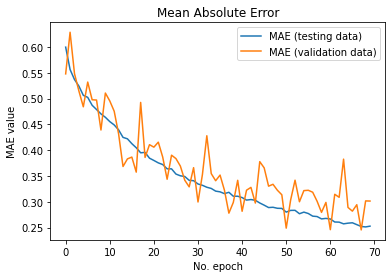

In [0]:
# Plot history: Mean Absolute Error
plt.plot(LOSS, label='MAE (testing data)')
plt.plot(VAL_LOSS, label='MAE (validation data)')
plt.title('Mean Absolute Error')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()


**Accuracy**

In [0]:
ACC=hist.history['acc']+hist2.history['acc']+hist3.history['acc']
VAL_ACC=hist.history['val_acc']+hist2.history['val_acc']+hist3.history['val_acc']


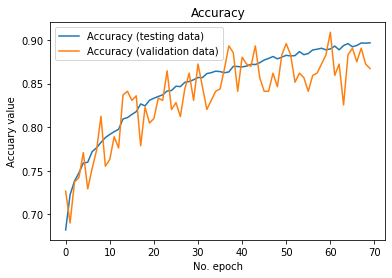

In [0]:
# Plot history: Accuracy
plt.plot(ACC, label='Accuracy (testing data)')
plt.plot(VAL_ACC, label='Accuracy (validation data)')
plt.title('Accuracy')
plt.ylabel('Accuary value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


**Complete Training History**

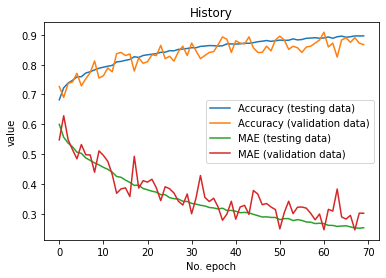

In [0]:
# Plot history
plt.plot(ACC, label='Accuracy (testing data)')
plt.plot(VAL_ACC, label='Accuracy (validation data)')
plt.plot(LOSS, label='MAE (testing data)')
plt.plot(VAL_LOSS, label='MAE (validation data)')
plt.title('History')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()


#### For 61 epoch the validation accuracy is max.For the same epoch the training error and validation error is minimum.

####Hence after 61 epoch the model is overfitting.

#Training New Model for 61 epochs

In [0]:
final=model.fit_generator(
    train_generator,
    epochs=61,
    steps_per_epoch=851,
    validation_data=val_generator,
    validation_steps=12
    )

Epoch 1/61
851/851 [==============================] - 150s 176ms/step - loss: 0.5934 - acc: 0.6836 - val_loss: 0.5739 - val_acc: 0.7135
Epoch 2/61
851/851 [==============================] - 148s 174ms/step - loss: 0.5561 - acc: 0.7237 - val_loss: 0.5939 - val_acc: 0.6875
Epoch 3/61
851/851 [==============================] - 149s 175ms/step - loss: 0.5353 - acc: 0.7383 - val_loss: 0.5898 - val_acc: 0.7135
Epoch 4/61
851/851 [==============================] - 148s 174ms/step - loss: 0.5246 - acc: 0.7465 - val_loss: 0.5127 - val_acc: 0.7656
Epoch 5/61
851/851 [==============================] - 147s 172ms/step - loss: 0.5157 - acc: 0.7526 - val_loss: 0.4666 - val_acc: 0.7839
Epoch 6/61
851/851 [==============================] - 147s 173ms/step - loss: 0.5014 - acc: 0.7616 - val_loss: 0.5146 - val_acc: 0.7422
Epoch 7/61
851/851 [==============================] - 147s 173ms/step - loss: 0.4934 - acc: 0.7684 - val_loss: 0.4913 - val_acc: 0.7891
Epoch 8/61
851/851 [============================

In [0]:
test_generator=image_gen.flow_from_directory(
    "test/",
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 2882 images belonging to 2 classes.


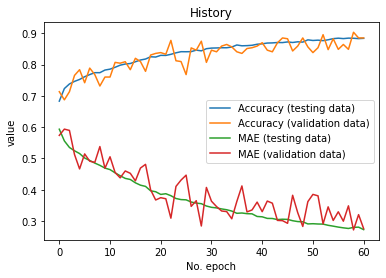

In [0]:
# Plot history
plt.plot(final.history['acc'], label='Accuracy (testing data)')
plt.plot(final.history['val_acc'], label='Accuracy (validation data)')
plt.plot(final.history['loss'], label='MAE (testing data)')
plt.plot(final.history['val_loss'], label='MAE (validation data)')
plt.title('History')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()


In [0]:
test_hist=model.evaluate_generator(
    test_generator,
    steps=91
)

In [0]:
test_hist

[0.29765086766334975, 0.8733518390006939]

**Train Accuracy:0.8844**<br>
**Validation Accuaracy:0.9036**<br>
**Test Accuarcy:0.8733**<br>

#Save Model


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
model.save('model.h5')
model_file = drive.CreateFile({'title' : 'model.h5'}) 
model_file.SetContentFile('model.h5')
model_file.Upload()


In [0]:
# download to google drive    
drive.CreateFile({'id': model_file.get('id')})


GoogleDriveFile({'id': '1kmdDPZkatzwtUFIeIL56HQJIPnfPhaep'})

#Read Model

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls 

adc.json  EarData	 keras.h5  sample_data	train
drive	  Gender_Rec.h5  model.h5  test		val


In [0]:
from keras.models import load_model
readmodel = load_model('model.h5')


In [0]:
readmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      